In [19]:
import pathlib
import random

import cv2
import matplotlib.pyplot as plt

In [ ]:
# Make it possible to view images within the notebook.
%matplotlib inline

In [2]:
# If we're working on mel, we're probably going to want to reload changed
# modules.
%load_ext autoreload
%autoreload 2

In [4]:
import mel.lib.common

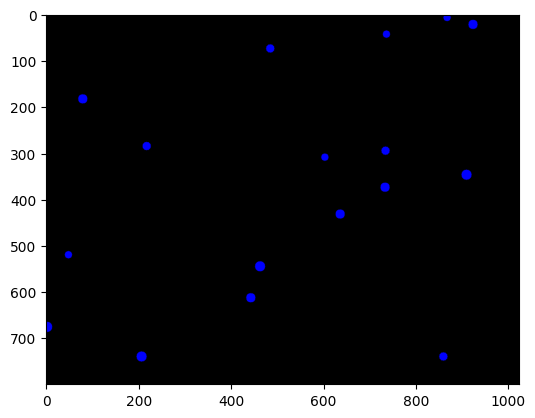

In [43]:
image_width, image_height = (1024, 800)
image = mel.lib.common.new_image(image_height, image_width)

points = [
    [100, 150],
    [150, 50],
]

points = [
    [random.randrange(image_width), random.randrange(image_height), random.randrange(8, 12)]
    for _ in range(random.randrange(1, 20))
]

for x, y, radius in points:
   mel.lib.common.draw_circle(image, x, y, radius, (0, 0, 255))

plt.imshow(image)

In [45]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [48]:
to_tensor = torchvision.transforms.ToTensor()
model(to_tensor(image).unsqueeze(0))

[{'boxes': tensor([[3.4989e+02, 0.0000e+00, 1.0240e+03, 6.6303e+02],
          [2.3374e+02, 1.5330e+02, 7.3890e+02, 6.1423e+02],
          [4.5147e+02, 3.1882e+01, 9.1182e+02, 5.0660e+02],
          [7.3676e+02, 0.0000e+00, 1.0238e+03, 8.0000e+02],
          [1.5007e+02, 2.5115e+02, 6.4796e+02, 7.1182e+02],
          [7.1667e+02, 0.0000e+00, 1.0240e+03, 3.4968e+02],
          [6.9002e+01, 1.7044e+02, 9.1742e+01, 1.8925e+02],
          [7.9801e+01, 1.1916e+02, 5.6183e+02, 5.6818e+02],
          [3.9164e+01, 0.0000e+00, 1.0240e+03, 4.0059e+02],
          [5.1455e+02, 3.1245e+02, 1.0240e+03, 7.5825e+02],
          [1.7360e+02, 1.6149e+01, 6.7050e+02, 4.4292e+02],
          [7.9604e+02, 2.3391e+01, 9.9011e+02, 5.2314e+02],
          [9.0417e+02, 1.3283e+01, 1.0211e+03, 6.9188e+02],
          [2.8812e+01, 0.0000e+00, 7.5033e+02, 6.6052e+02],
          [5.3965e+02, 0.0000e+00, 9.4318e+02, 3.5303e+02],
          [2.5700e+02, 2.8247e+02, 9.1318e+02, 8.0000e+02],
          [5.1231e+01, 1.8484e+